In [3]:
#%pip install lifelines
from lifelines import KaplanMeierFitter, NelsonAalenFitter
from nelson_aalen import _build
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt
import pandas as pd
from typing import Tuple

* ## You may play around with the lifelines package. 
* ## This package can be used in analyzing simple survival data. 
* ## For the case of more complex survival data, no stable package is available 
* ## (i.e., recurrent events with competing risk scenario).
* ## In this case, you might need to hard-code your formulation."

Text(0.5, 1.0, 'KM survival estimate for the two groups [using lifeline package]')

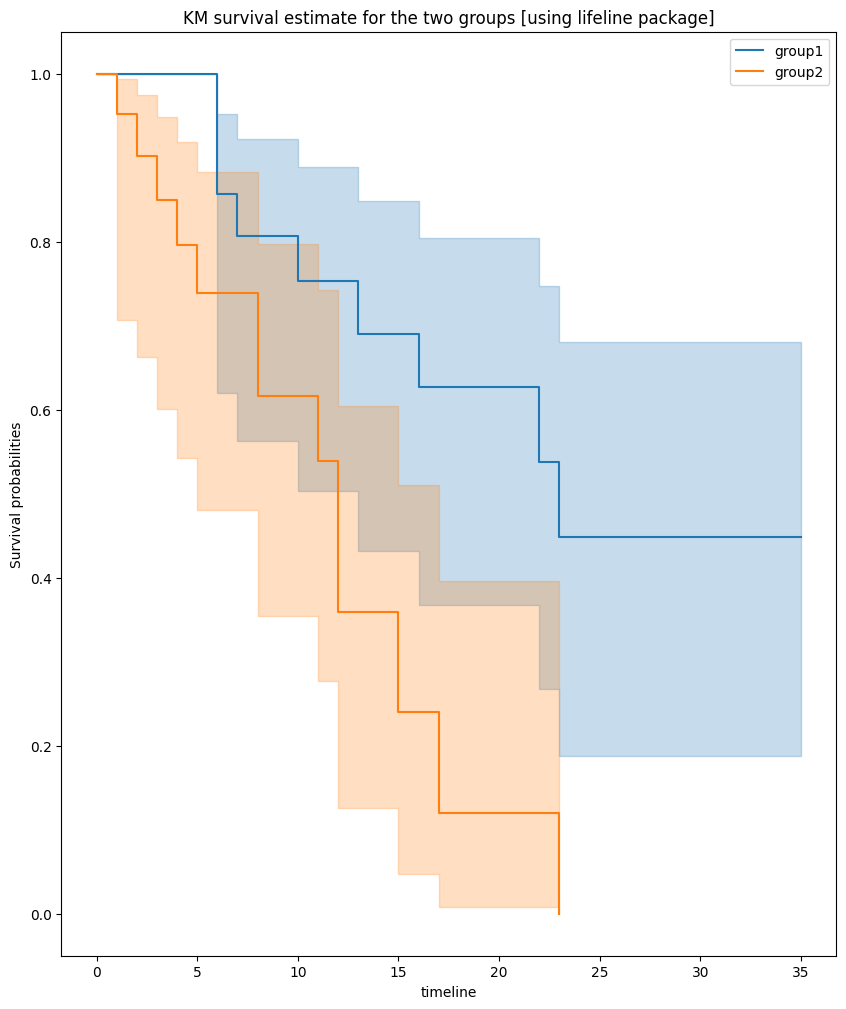

In [7]:
data = _build() # Load the data from our _build function we've created earlier
df1, df2 = data.loc[:, ['surv1',"delta1"]], data.loc[:, ['surv2',"delta2"]] # subset the two groups 

km1 = KaplanMeierFitter() # Instantiating the KaplanMeirFitter Class
km1.fit(data.loc[:, "surv1"], event_observed = data.loc[:, "delta1"], label = "group1") # fitting your data
# Do the same for the other group
km2 = KaplanMeierFitter()
km2.fit(data.loc[:, "surv2"], event_observed = data.loc[:, "delta2"], label = "group2")

#Plot the results
plt.figure(figsize = (10, 12))
ax = km1.plot(ci_show= True)
km2.plot(ax = ax, ci_show=True)
plt.ylabel("Survival probabilities")
plt.title("KM survival estimate for the two groups [using lifeline package]")

* ## Comment on the above plot
* Answer here..

In [9]:
# You may print out the estimated 95% CI
print(f"\n-------------------------------------------")
print(km1.confidence_interval_)
print(f"\n-------------------------------------------")


-------------------------------------------
      group1_lower_0.95  group1_upper_0.95
0.0            1.000000           1.000000
6.0            0.619718           0.951552
7.0            0.563147           0.922809
9.0            0.563147           0.922809
10.0           0.503200           0.889362
11.0           0.503200           0.889362
13.0           0.431610           0.849066
16.0           0.367511           0.804912
17.0           0.367511           0.804912
19.0           0.367511           0.804912
20.0           0.367511           0.804912
22.0           0.267779           0.746791
23.0           0.188052           0.680143
25.0           0.188052           0.680143
32.0           0.188052           0.680143
34.0           0.188052           0.680143
35.0           0.188052           0.680143

-------------------------------------------


* # We now carry out the log-rank test to investigaate the survival difference between the two curves using lifeline package
* ## Your implementation results [hard-codding in your assignment] must not differ much from the results below

In [10]:
def logrank_p_value(df1: pd.DataFrame = df1, df2: pd.DataFrame = df2) -> Tuple:
    result = logrank_test(df1.surv1, df2.surv2,
                          df1.delta1,df2.delta2)
    return result.p_value

p = logrank_p_value()
print(f"\n-----------------------------------")
print(f"\n >>>> The level of significance used: alpha = 0.05\
      \n >>>> p-value obtained from the log-rank test: p = {p:4f}")
print(f"\n-----------------------------------")


-----------------------------------

 >>>> The level of significance used: alpha = 0.05      
 >>>> p-value obtained from the log-rank test: p = 0.005291

-----------------------------------


* # Comment on the above results
* Answer here...